In [16]:
%matplotlib inline
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Model import SugarscapeModel
from mesa.batchrunner import BatchRunner

np.linspace(1,50, 10)

array([  1.        ,   6.44444444,  11.88888889,  17.33333333,
        22.77777778,  28.22222222,  33.66666667,  39.11111111,
        44.55555556,  50.        ])

In [20]:
sugarscape = SugarscapeModel()
#Some params should each be a range(a,b)
params = {"height": 50, 
          "width": 50, 
          "init_agents": 500, 
          "max_metabolism": 3, 
          "max_vision": 10,
          "max_init_sugar": 5, 
          "min_age": 30, 
          "max_age": 60, 
          "init_poll": 2,
          "ex_ratio": np.linspace(1,100, 20)}

def get_avg_pollution(model):
    dc = model.datacollector
    m_data = dc.get_model_vars_dataframe()
    m_data = m_data.dropna()
    return m_data.describe().Wealth.iloc[1]

model_reporters = {"Wealth": get_avg_pollution}

In [21]:
param_sweep = BatchRunner(SugarscapeModel, 
                          params, 
                          iterations=1, 
                          max_steps=200, 
                          model_reporters=model_reporters)

In [22]:
param_sweep.run_all()

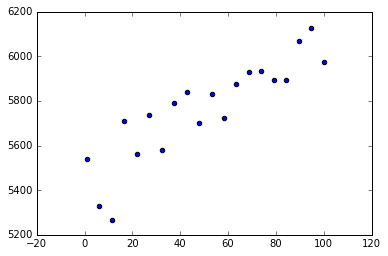

In [23]:
data = param_sweep.get_model_vars_dataframe()
plt.scatter(data.ex_ratio, data.Wealth)

In [24]:
plt.savefig('largeel_high_met_sweep.png')
# data.to_csv('param_sweep_double.csv')
# data = pd.read_csv('param_sweep_double.csv', index)

In [5]:
data.head()

,Unnamed: 0,Run,Wealth,ex_ratio,height,init_agents,init_poll,max_age,max_init_sugar,max_metabolism,max_vision,min_age,width
0,0,845,5345.367748,5,50,500,9,60,5,3,10,30,50
1,1,877,5311.946497,8,50,500,9,60,5,3,10,30,50
2,2,422,5215.705758,3,50,500,5,60,5,3,10,30,50
3,3,271,5298.959470,8,50,500,3,60,5,3,10,30,50
4,4,506,5455.354732,1,50,500,6,60,5,3,10,30,50


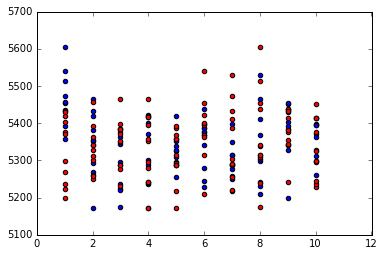

In [33]:
one = data[data.init_poll==1]
ten = data[data.init_poll==10]
plt.scatter(one.ex_ratio, one.Wealth)
plt.scatter(ten.ex_ratio, one.Wealth, c='red')